--- Step 1: Synthetic GPS Data Generated ---
    Latitude  Longitude           Timestamp
0  40.719277 -73.990770 2025-09-22 08:38:57
1  40.815590 -73.895895 2025-09-22 10:23:02
2  40.752191 -73.990752 2025-09-22 01:20:32
3  40.695551 -74.011623 2025-09-22 17:58:41
4  40.827456 -73.908258 2025-09-22 15:50:43




C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tilak\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tilak\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

--- Step 2: K-Means Applied with k=3 ---
Identified geographical clusters (congestion zones).

--- Step 3: Peak Hour Analysis per Zone ---
    Cluster  Hour  count
17        0    17    167
31        1     7     27
65        2    17    189


Congestion zone map saved as 'traffic_congestion_zones.png'

--- Analysis Complete ---


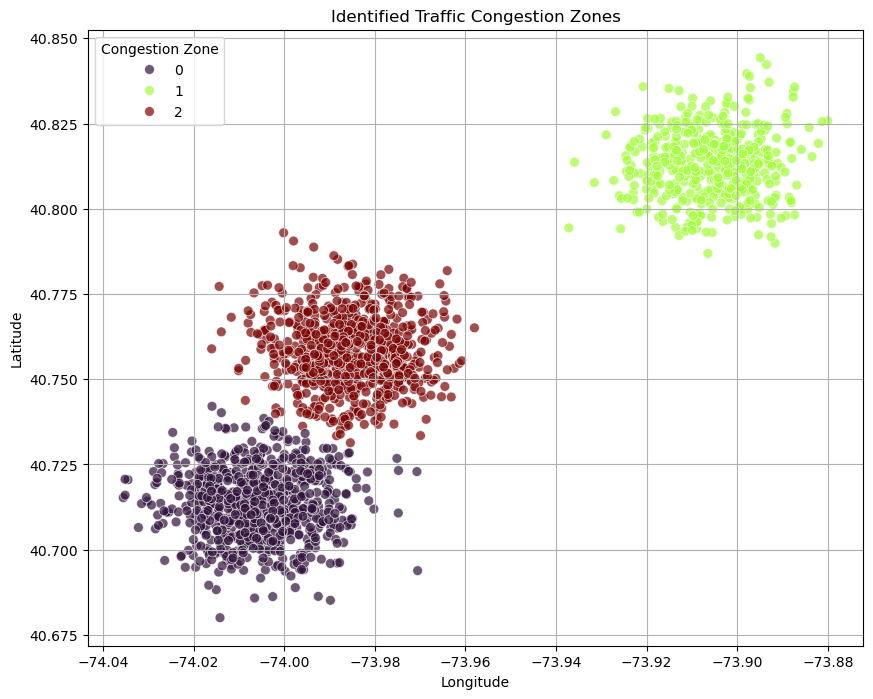

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load (Generate) GPS Data ---
    np.random.seed(42)
    num_points = 2000

    # Define centers for 3 congestion zones (e.g., Downtown, Suburb, Business Park)
    centers = {
        "Downtown": [40.7128, -74.0060],
        "Business Park": [40.7580, -73.9855],
        "Suburb": [40.8128, -73.9060]
    }
    
    # Generate points and timestamps, concentrating data during peak hours for some zones
    points = []
    for i in range(num_points):
        # Peak hours (8-9 AM, 5-6 PM)
        if 0.2 < np.random.rand() < 0.5: 
            hour = np.random.choice([8, 17])
            zone = np.random.choice(["Downtown", "Business Park"])
        else: # Off-peak hours
            hour = np.random.randint(0, 24)
            zone = np.random.choice(list(centers.keys()))
            
        center = centers[zone]
        lat = center[0] + np.random.randn() * 0.01
        lon = center[1] + np.random.randn() * 0.01
        timestamp = pd.Timestamp(f'2025-09-22 {hour:02d}:{np.random.randint(0,60):02d}:{np.random.randint(0,60):02d}')
        points.append([lat, lon, timestamp])

    df = pd.DataFrame(points, columns=['Latitude', 'Longitude', 'Timestamp'])
    
    print("--- Step 1: Synthetic GPS Data Generated ---")
    print(df.head())
    print("\n")

    # --- Step 2: Cluster Geographically ---
    coords = df[['Latitude', 'Longitude']]
    scaler = StandardScaler()
    coords_scaled = scaler.fit_transform(coords)

    # Apply K-Means
    k = len(centers)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    df['Cluster'] = kmeans.fit_predict(coords_scaled)
    
    print(f"--- Step 2: K-Means Applied with k={k} ---")
    print("Identified geographical clusters (congestion zones).\n")

    # --- Step 3: Analyze Time Patterns ---
    df['Hour'] = df['Timestamp'].dt.hour
    
    print("--- Step 3: Peak Hour Analysis per Zone ---")
    # Group by cluster and hour, then find the hour with the most traffic for each cluster
    peak_hours = df.groupby(['Cluster', 'Hour']).size().reset_index(name='count')
    peak_hours = peak_hours.loc[peak_hours.groupby('Cluster')['count'].idxmax()]
    
    print(peak_hours)
    print("\n")

    # --- Visualization ---
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Cluster', palette='turbo', s=50, alpha=0.7)
    plt.title('Identified Traffic Congestion Zones')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Congestion Zone')
    plt.grid(True)
    plt.savefig('traffic_congestion_zones.png')
    print("Congestion zone map saved as 'traffic_congestion_zones.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")